In [1]:
# This notebook uses Python 3

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
PATH_BASE = os.getcwd()
#print("PATH_BASE = ", PATH_BASE)

os.chdir( "../../figs")
PATH_FIGS = os.getcwd()
#print("PATH_FIGS = ", PATH_FIGS )

os.chdir( PATH_BASE )
os.chdir( "../libs")
PATH_LIBS = os.getcwd()
#print("PATH_LIBS = ", PATH_LIBS )

# re-set path back to base
os.chdir( PATH_BASE )
#print("Currently in: ", os.getcwd() )


In [3]:
# Libraries created by MZ
os.chdir( PATH_LIBS )

import plotting as pg
import costgrad_vec as cg
import common as nc
import algos_vec as ao
import params as pm

os.chdir( PATH_BASE )


# ==================== EXPERIMENT ======================

In [4]:
nom = cg.get_cost_names()
print(nom)
name = nom[0]
print("name = ", name)

p_init = cg.get_p_init(name)
print("p_init = ", p_init)

p_target = cg.get_p_target(name)
print("p_target = ", p_target)

# parameters ----------------------------
num      = 100
b_print  = True
rho_targ = 0.1
#alpha    = 0.03

# Increase alpha by a factor of i_factor at i = i_manual.  To skip this, set i<0
i_manual = -1
i_factor = 1

#g_rho_type = "original"
g_rho_type = "new"

# Definition of rho --------------
print("g_rho_type = ", g_rho_type)
        

['x^2', 'x^4', 'ellipse', '1Dsigwell', '2Dshell', 'Beale']
name =  x^2
p_init =  [-3.]
p_target =  [0.]
g_rho_type =  new


In [5]:
# ========================== GD Family ==========================
#type_opt = "dp_GD_basic"
#type_opt = "dp_GD_momentum"
#type_opt = "dp_GD_Nesterov"
#type_opt = "dp_RMSProp"
type_opt = "dp_Adam"

alpha, num1 = pm.get_alpha_num( name, type_opt )
print("new values: alpha,num1 = ", alpha, num1)

d_res_GD = ao.do_GDFamily(name, alpha, num, p_init.copy(), p_target, type_opt, rho_targ, b_print, i_manual, i_factor, g_rho_type)


new values: alpha,num1 =  0.03 100
cost_old =  9.0
1: cost,rho,dotp = 8.643648437721208, 0.005049118233666147, 1.0
2: cost,rho,dotp = 8.468276333507898, 0.005098274830646699, 1.0
3: cost,rho,dotp = 8.294813680191956, 0.00514745140923246, 1.0
4: cost,rho,dotp = 8.123289355917056, 0.005196630559573241, 1.0
5: cost,rho,dotp = 7.953731041918773, 0.005245795927552212, 1.0
6: cost,rho,dotp = 7.786165145675071, 0.005294932289235313, 1.0
7: cost,rho,dotp = 7.620616729973375, 0.005344025614525576, 1.0
8: cost,rho,dotp = 7.45710944834284, 0.005393063119526561, 1.0
9: cost,rho,dotp = 7.295665487222589, 0.005442033307304699, 1.0
10: cost,rho,dotp = 7.1363055151555805, 0.005490925996923202, 1.0
11: cost,rho,dotp = 6.97904863921489, 0.005539732340801729, 1.0
12: cost,rho,dotp = 6.823912368786334, 0.0055884448306281875, 1.0
13: cost,rho,dotp = 6.670912586750025, 0.005637057292208053, 1.0
14: cost,rho,dotp = 6.5200635280250685, 0.0056855648697821315, 1.0
15: cost,rho,dotp = 6.371377765367528, 0.005733

max index =  100
final arclength (sumd_x) =  2.3266618736668332966
final distance (sumd_y) =  2.3266618736668332969


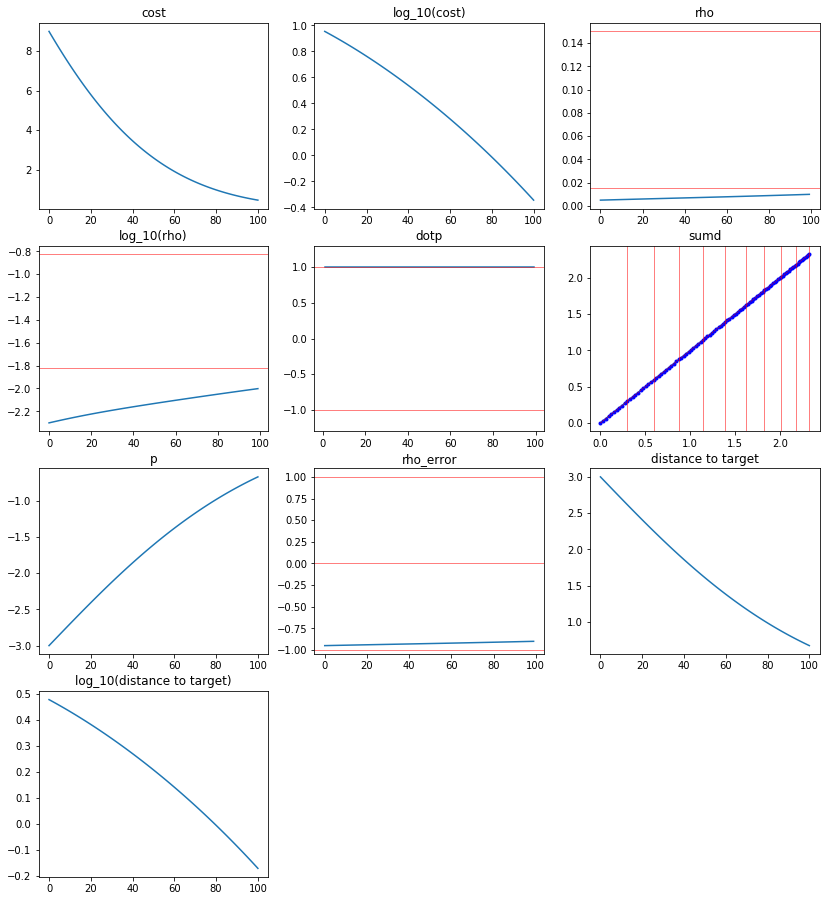

In [6]:
sumd_line_freq = 10
pg.do_Plots_final(d_res_GD, pm.g_rhomin, pm.g_rhomax, sumd_line_freq)
pg.do_plot_special(name, d_res_GD)
#filename = None
#pg.do_plot_2Dshell_special(name, d_res_GD, "2Dshell", filename, pm.g_ymin_2Dshell, pm.g_ymax_2Dshell)


In [7]:
# ========================== Neo Family ==========================
#type_opt = "dp_GD_basic"
type_opt = "dp_GD_momentum"
#type_opt = "dp_GD_Nesterov"
#type_opt = "dp_RMSProp"
#type_opt = "dp_Adam"

alpha = pm.g_alpha_Neo_init
d_res_Neo = ao.do_Neograd(name, alpha, num, p_init.copy(), p_target, type_opt, rho_targ, b_print, g_rho_type)
#d_res_Neo = ao.do_Neograd_dbl(name, alpha, num, p_init.copy(), p_target, type_opt, rho_targ, b_print, g_rho_type)


0  ============================================
alpha,rho =  0.017782794100389231579 0.009999999999999999518  ---------------
1  ============================================
alpha,rho =  0.027318412398413445623 0.017954700810274844322  ---------------
1: cost,rho,dotp = 8.033972785929487, 0.017954700810274844, 1.0
2  ============================================
alpha,rho =  0.03751027403231813081 0.028133313110912522441  ---------------
2: cost,rho,dotp = 7.155318719667929, 0.028133313110912522, 1.0
3  ============================================
alpha,rho =  0.04718518916738384893 0.03993724896758493544  ---------------
3: cost,rho,dotp = 6.0579142104125605, 0.03993724896758494, 1.0
4  ============================================
alpha,rho =  0.055356716673986721703 0.052788765867648680234  ---------------
4: cost,rho,dotp = 4.846280189475889, 0.05278876586764868, 1.0
5  ============================================
alpha,rho =  0.06135193459787022643 0.06627782467997505319  ----------

max index =  100
final arclength (sumd_x) =  2.9999999999742996003
final distance (sumd_y) =  2.9999999999742995992


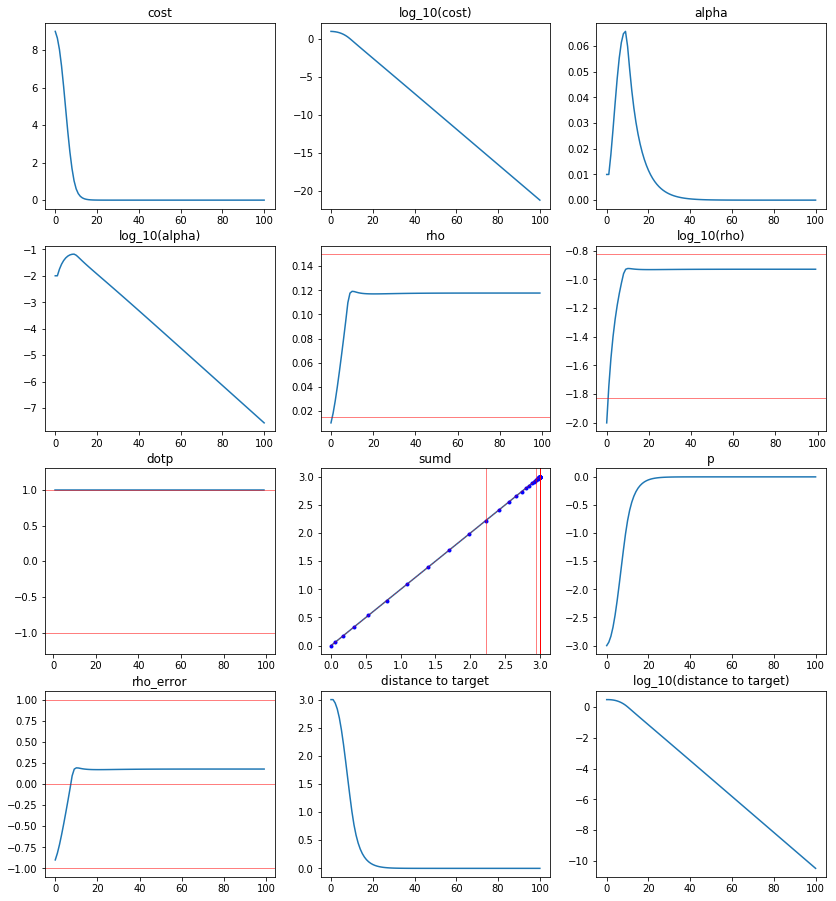

In [8]:
sumd_line_freq = 10
pg.do_Plots_final(d_res_Neo, pm.g_rhomin, pm.g_rhomax, sumd_line_freq)
pg.do_plot_special(name, d_res_Neo)
#filename = None
#pg.do_plot_2Dshell_special(name, d_res_Neo, "2Dshell", filename, pm.g_ymin_2Dshell, pm.g_ymax_2Dshell)


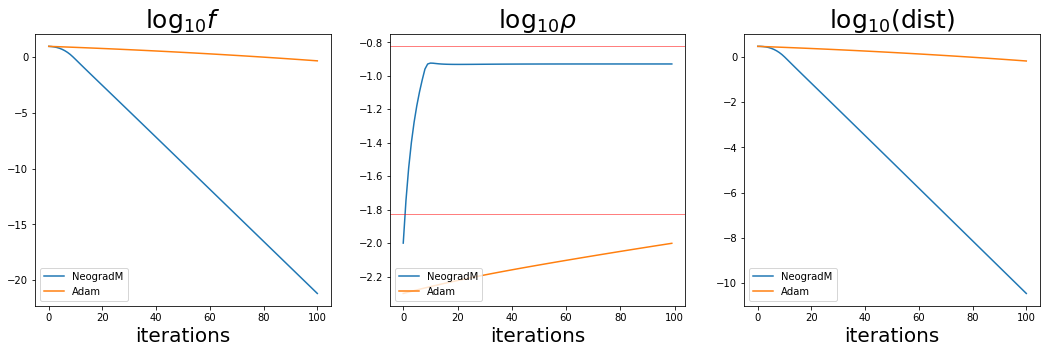

In [9]:
nrows = 1
ncols = 3
plt.figure(1, figsize=(6*ncols, 5*nrows))

size_title = 25
size_label = 20

idx = 1
# log(cost) --------------------------------
plt.subplot(nrows, ncols, idx)
plt.plot( np.log10(d_res_Neo["cost"]), label="NeogradM")
plt.plot( np.log10(d_res_GD["cost"]), label="Adam")
plt.title(r'$\log_{10}f$', fontsize= size_title)
plt.legend(loc = 'lower left')
plt.xlabel(r'iterations', fontsize= size_label)

# log(rho) --------------------------------
idx += 1
plt.subplot(nrows, ncols, idx)
plt.plot( np.log10(d_res_Neo["rho"]), label="NeogradM")
plt.plot( np.log10(d_res_GD["rho"]), label="Adam")
plt.title(r'$\log_{10} \rho$', fontsize= size_title)
plt.legend(loc = 'lower left')
plt.xlabel(r'iterations', fontsize= size_label)
plt.axhline(y=np.log10(pm.g_rhomin), color='red', linewidth=0.5)
plt.axhline(y=np.log10(pm.g_rhomax), color='red', linewidth=0.5)

# log(dist) --------------------------------
idx += 1
plt.subplot(nrows, ncols, idx)
plt.plot( np.log10(d_res_Neo["dist"]), label="NeogradM")
plt.plot( np.log10(d_res_GD["dist"]), label="Adam")
plt.title(r'$\log_{10}$(dist)', fontsize= size_title)
plt.legend(loc = 'lower left')
plt.xlabel(r'iterations', fontsize= size_label)

#plt.savefig(PATH_FIGS + "/quadratic-triple.png")
plt.show()
